<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
     
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from numpy import linalg as LA
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
data.duplicated().sum()

153

Наши данные состоят из 5 колонок и 5000 строк, пропусков нет, имеются дубликаты (153), удалим дубликаты, т.к. думаю в нашем исследовании они не нужны.

In [8]:
data = data.drop_duplicates()

Видим что в столбцах "Возраст" и "Зарплата" тип данных float, хотя значения целые, так что поменяем на целые числа.

In [9]:
data['Зарплата'] = data['Зарплата'].astype('int')
data['Возраст'] = data['Возраст'].astype('int')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Страховые выплаты', ylabel='Density'>

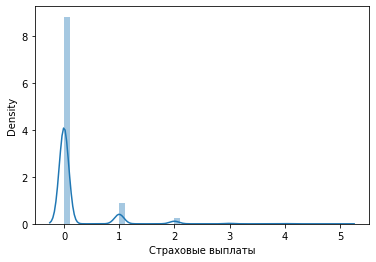

In [10]:
sns.distplot(data['Страховые выплаты'])

Как мы видим, выплат производится очень мало.

                        Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.001953  0.015456    -0.007315   
Возраст            0.001953  1.000000 -0.017386    -0.009064   
Зарплата           0.015456 -0.017386  1.000000    -0.031687   
Члены семьи       -0.007315 -0.009064 -0.031687     1.000000   
Страховые выплаты  0.011565  0.654964 -0.013123    -0.039303   

                   Страховые выплаты  
Пол                         0.011565  
Возраст                     0.654964  
Зарплата                   -0.013123  
Члены семьи                -0.039303  
Страховые выплаты           1.000000  


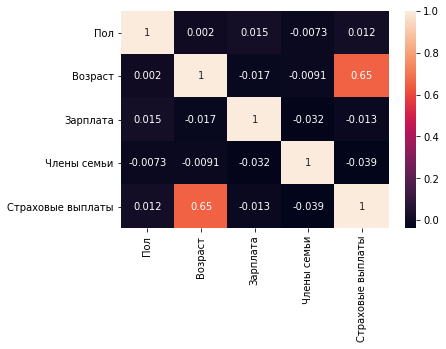

In [11]:
print(data.corr())
data_plot = sns.heatmap(data.corr(), annot=True)
plt.show()

<b>ВЫВОД</b>

Из графиков видно что, по объёму не выплат страховок больше всего, а если и производятся, то чаще всего это люди старше 40 лет с семьями от 2х человек

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится, изменится лишь вектор весов линейной регрессии для новых признаков.

**Обоснование:** Представим нашу новую матрицу признаков как результат умножения исходной матрицы признаков на некую обратимую матрицу:

$$
X_1 = XP
$$

В таком случае наша формула обучения примет следующий вид:
    
$$
w_1 = (X^T_1 X_1)^{-1} X^T_1 y
$$

Подставив в нее значения X_1, получим:    
$$
w_1 = ((XP)^{T} XP)^{-1} (XP)^{T}y
$$

Воспользуемся следующими свойствами матриц:
    
$$
A(BC) = (AB)C
$$

$$
(AB)^{-1} = A^{-1} B^{-1}
$$

$$
(AB)^{T} = A^{T} B^{T}
$$

$$
(A^{T})^{-1} = (A^{-1})^{T}
$$

$$
(ABC)^{-1} = C^{-1} B^{-1} A^{-1}
$$

$$
(AA)^{-1} = E
$$

$$
AE = EA = A
$$

Тогда нашу формулу для расчета вектора весов можно переписать:

$$
w_1 = ((XP)^{T} XP)^{-1} (XP)^{T}y
$$

$$
w_1 = (P^{T} (X^{T} X)P)^{-1} (XP)^{T}y
$$

$$
w_1 = (P^{T} (X^{T} X)P)^{-1} (P)^{T} (X)^{T}y
$$

$$
w_1 = P^{-1} (X^{T} X)^{-1} (P^{T})^{-1} P^{T}X^{T}y
$$

$$
w_1 = P^{-1} (X^{T} X)^{-1} EX^{T}y
$$

$$
w_1 = P^{-1}w
$$

Тоже самое, для формулы предсказаний: $$a_1 = X_1 w_1$$, подставив получившиеся значения X_1 = XP
и w_1 = P^{-1}w, получим:

$$
a_1 = XPP^{-1}w <|-|> a_1 = Xw
$$

## Алгоритм преобразования

**Алгоритм**

1. Создаём рандомную матрицу 
2. Проверяем её на обратимость
3. Создаём новую матрицу данных 
4. Ищем метрики качества и на исходных данных и на преобразованных
5. Опишем вывод полученных результатов

**Обоснование**

Если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных.

## Проверка алгоритма

In [12]:
X = data.drop('Страховые выплаты', axis=1).values
y = data['Страховые выплаты'].values

In [13]:
matrix = np.random.normal(size = (4,4)) 
matrix

array([[ 0.12470445, -0.24017776,  0.02229809, -1.38062562],
       [-0.2652034 , -0.7941938 , -1.12328199, -2.53558864],
       [ 0.1623366 ,  1.45060601,  0.0066511 ,  0.70963965],
       [-0.22850392,  0.75527886, -1.00088328,  0.07809289]])

In [14]:
matrix = LA.inv(matrix)
matrix

array([[ 41.70271654, -29.06284898, -26.38184998,  33.37072181],
       [ -6.53484973,   4.82190625,   5.12303159,  -5.52312287],
       [-14.14384095,  10.01613684,   9.64563175, -12.49113955],
       [  3.95086043,  -3.30215546,  -3.11836391,   3.773275  ]])

In [15]:
def get_rand_matrix(X):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1], data.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

In [16]:
get_rand_matrix(X)

array([[ 0.20827385,  0.44660288, -0.33986189, -0.49797754, -0.76187985],
       [ 0.6714392 ,  0.28539736, -0.32934601,  0.87631121,  0.39754707],
       [-2.3099056 , -1.01589099,  0.09274362,  1.11162693,  1.48496407],
       [ 1.75771181,  0.33387529,  0.78057983,  0.04033109, -0.74081759],
       [ 0.42930692,  0.56798947,  0.58513375,  0.0486124 ,  0.36724351]])

Попробуем создать алгоритм для линейной регрессии.

In [17]:
X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

array([ 0.28879543,  0.58819114,  0.43556561, ..., -0.02396203,
       -0.05362882,  0.08863882])

In [18]:
model = LinearRegression()
model.fit(X,y)
predict = model.predict(X)
predict

array([ 0.51932879,  0.69230097,  0.09412745, ..., -0.26164511,
       -0.19394186,  0.05044763])

In [19]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print('Метрика качества линейной регрессии R2 на исходных признаках:',r2_score(y, predictions))

matrix_new = X @ matrix
model.fit(matrix_new, y)
predictions = model.predict(matrix_new)
print('Метрика качества линейной регрессии R2 на преобразованных признаках:',r2_score(y, predictions))

Метрика качества линейной регрессии R2 на исходных признаках: 0.4302010046633359
Метрика качества линейной регрессии R2 на преобразованных признаках: 0.43020100466328604


Качество линейной регрессии не изменилось, метрика R2 сильно не меняет совего значения, значит можно сделать вывод, что алгоритм преобразования данных работает правильно.

<b>ВЫВОД</b>

От нас требовалось защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Преобразование требовалось произвести таким образом, чтобы по результату работы нашего алгоритма, качество моделей машинного обучения не ухудшилось.

В результате нашей работы был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу. Результатом такого преобразования явилась новая (изменённая) матрица признаков, которая справилась с основными задачами.

Таким образом мы выполнили требования поставленной задачи и компания «Хоть потоп» будет защищена от утечки персональных данных. 

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования